<a href="https://colab.research.google.com/github/abjaffrey/EDA-on-Global-Terrorism-Analysis/blob/main/Copy_of_Copy_of_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [1]:
# importing numpy and pands library 
import numpy as pd
import pandas as pd

In [2]:
# importing matplotlib library
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# reading the csv file from drive
df=pd.read_csv('/content/drive/MyDrive/Copy of Global Terrorism Data.csv', encoding = "ISO-8859-1", engine='python')

In [33]:
# printing  the head of csv to lookup at the data
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [34]:
# Keeping required columns and removing unwanted columns
columns_required = ['iyear','country_txt','region_txt','city','attacktype1_txt','targtype1_txt','ransomamt','gname','nkill']

In [35]:
# Creating new df required for analysis
new_df = df[columns_required].copy()

In [36]:
new_df.head()

,iyear,country_txt,region_txt,city,attacktype1_txt,targtype1_txt,ransomamt,gname,nkill
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,NaN,MANO-D,1.0
1,1970,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),800000.0,23rd of September Communist League,0.0
2,1970,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,NaN,Unknown,1.0
3,1970,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),NaN,Unknown,NaN
4,1970,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),NaN,Unknown,NaN


In [37]:
# Renaming the columns
new_df.rename(columns = {'iyear':'year','country_txt':'country','region_txt':'region','attacktype1_txt':'attack_type','targtype1_txt':'target_type','ransomamt':'ransom','gname':'gang_name','nkill':'people_killed'}, inplace = True)

In [63]:
new_df.isnull().sum()

year             0
country          0
region           0
city             0
attack_type      0
target_type      0
ransom           0
gang_name        0
people_killed    0
dtype: int64

In [39]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   year           181691 non-null  int64  
 1   country        181691 non-null  object 
 2   region         181691 non-null  object 
 3   city           181257 non-null  object 
 4   attack_type    181691 non-null  object 
 5   target_type    181691 non-null  object 
 6   ransom         1350 non-null    float64
 7   gang_name      181691 non-null  object 
 8   people_killed  171378 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 12.5+ MB


In [41]:
# Filling NaN values of ransom and people killed

new_df['people_killed'] = new_df['people_killed'].fillna(0)

mean = new_df['ransom'].mean()
new_df['ransom'].fillna(value=mean, inplace=True)

## ***italicized text***
TASKS TO DO
1. RENAME THE COLUMN 
2.REMOVING THE NOT NEEDED COLUMN 
3.PLOT CHART BY NUMBER OF CASUALITITES EACH YEAR WISE(1971-2017)
4.NUMBER OF ATTACKS COUNTRY WISE
5.REGION WISE TERRORIST ACTIVITIES
6.COIUNTRY WISE CASUALITIES TILL NOW
7.TOTAL ATTACK BY TYPE OF ATTACK 
8.CITY WISE DEATHS 
9.TERRORIST ACTIVIES BY GROUP LIKE TALIBAN ETC
10.TARGET TYPE GOVT OR PUBLIC ATTACK
11.RANSOM COLLECTED COUNTRY WISE


In [43]:
# storing data for year wise killed
year_killed_df = new_df[['year','people_killed']]

In [44]:
# Grouping the data by year wise killed and applying sum aggregate
year_killed_df = year_killed_df.groupby('year')['people_killed'].sum()

In [45]:
year_killed_df.head()

year
1970    174.0
1971    173.0
1972    566.0
1973    370.0
1974    539.0
Name: people_killed, dtype: float64

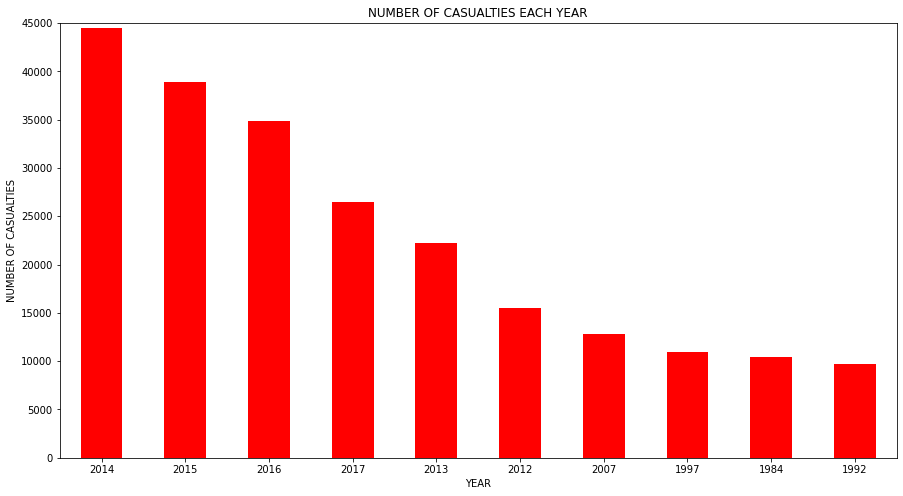

In [65]:
# Number of casualties each year
#year_killed_df.plot(kind='line')

new_df.groupby('year')['people_killed'].sum().sort_values(ascending=False)[0:10].plot(kind='bar',xlabel='YEAR',ylabel='NUMBER OF CASUALTIES',title='NUMBER OF CASUALTIES EACH YEAR',rot=0,figsize=(15,8),ylim=(0,45000),color='red')

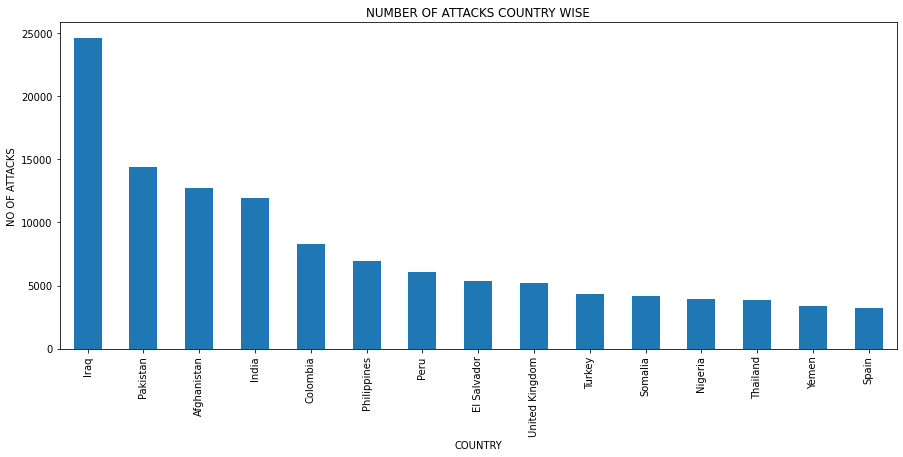

In [47]:
# Number of attacks country wise

new_df.groupby('country')['country'].count().sort_values(ascending=False)[0:15].plot.bar(xlabel='COUNTRY',ylabel='NO OF ATTACKS',title='NUMBER OF ATTACKS COUNTRY WISE',figsize=(15,6))

In [140]:
new_df.groupby('region')['region'].count()

region
Australasia & Oceania            282
Central America & Caribbean    10344
Central Asia                     562
East Asia                        802
Eastern Europe                  5139
Middle East & North Africa     50444
North America                   3456
South America                  18978
South Asia                     44824
Southeast Asia                 12237
Sub-Saharan Africa             17550
Western Europe                 16639
Name: region, dtype: int64

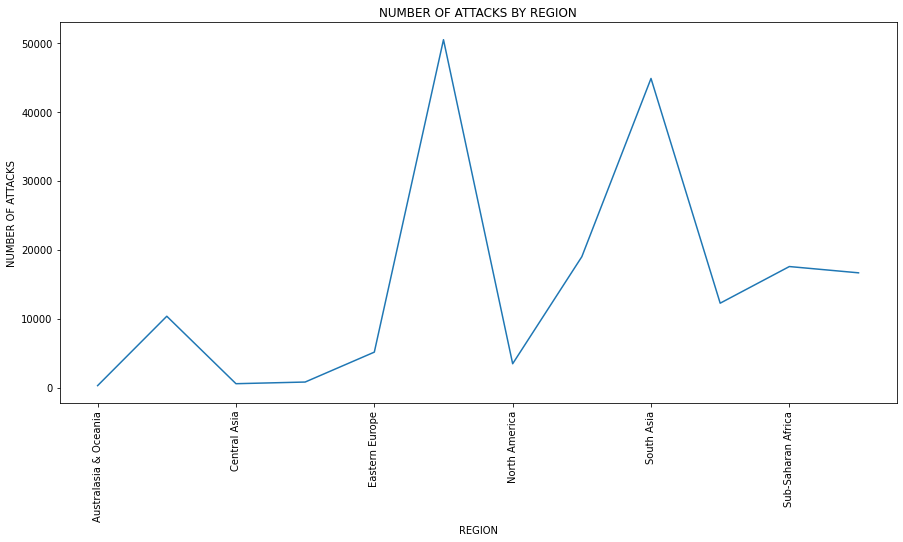

In [144]:
# Region wise terrorist activities

new_df.groupby('region')['region'].count().plot(xlabel='REGION',ylabel='NUMBER OF ATTACKS',title='NUMBER OF ATTACKS BY REGION',rot=90,figsize=(15,7))

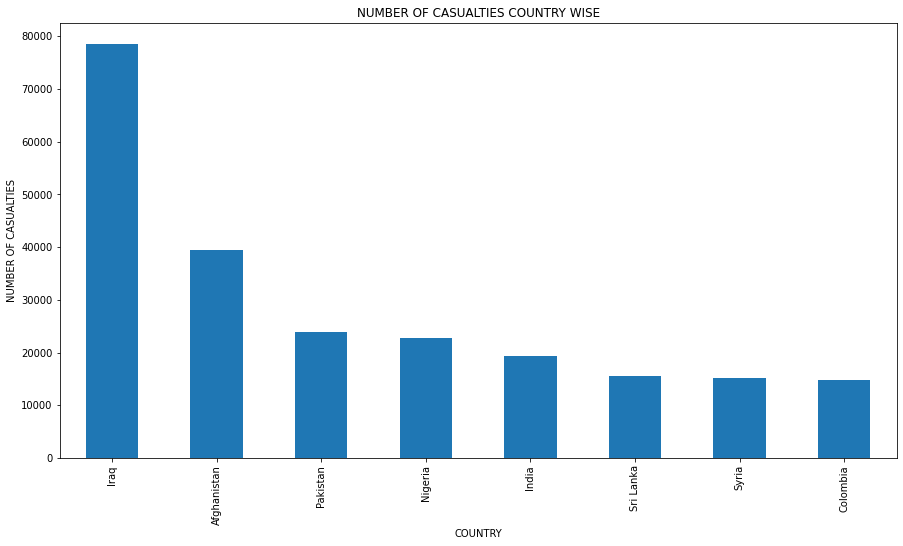

In [49]:
# Country wise casualties

new_df.groupby('country')['people_killed'].sum().sort_values(ascending=False)[0:8].plot.bar(xlabel='COUNTRY',ylabel='NUMBER OF CASUALTIES',title='NUMBER OF CASUALTIES COUNTRY WISE',figsize=(15,8))

In [50]:
# Total attack by type of attack

index_unknown_type = new_df[(new_df['attack_type']=='Unknown')].index
attack_type_df = new_df.drop(index_unknown_type)


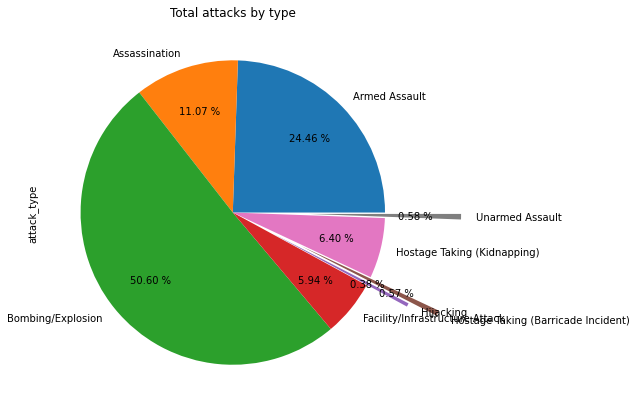

In [120]:
attack_type_df.groupby('attack_type')['attack_type'].count().plot.pie(title='Total attacks by type',figsize=(15,7),fontsize=10,autopct='%.2f %%',explode=(0,0,0,0,.3,.5,0,.5),pctdistance=0.7)

In [52]:
new_df.head()

,year,country,region,city,attack_type,target_type,ransom,gang_name,people_killed
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,3.172530e+06,MANO-D,1.0
1,1970,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),8.000000e+05,23rd of September Communist League,0.0
2,1970,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,3.172530e+06,Unknown,1.0
3,1970,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),3.172530e+06,Unknown,0.0
4,1970,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),3.172530e+06,Unknown,0.0


In [53]:
new_df.dropna(inplace=True)

In [54]:
new_df['people_killed'] = new_df['people_killed'].astype(int)

In [55]:
# City wise deaths
index_nill_death = new_df[(new_df['people_killed'] == 0)].index

city_df = new_df.drop(index_nill_death)


In [56]:
index_unknown_city = new_df[(new_df['city']=='Unknown')].index
city_df = new_df.drop(index_unknown_city)

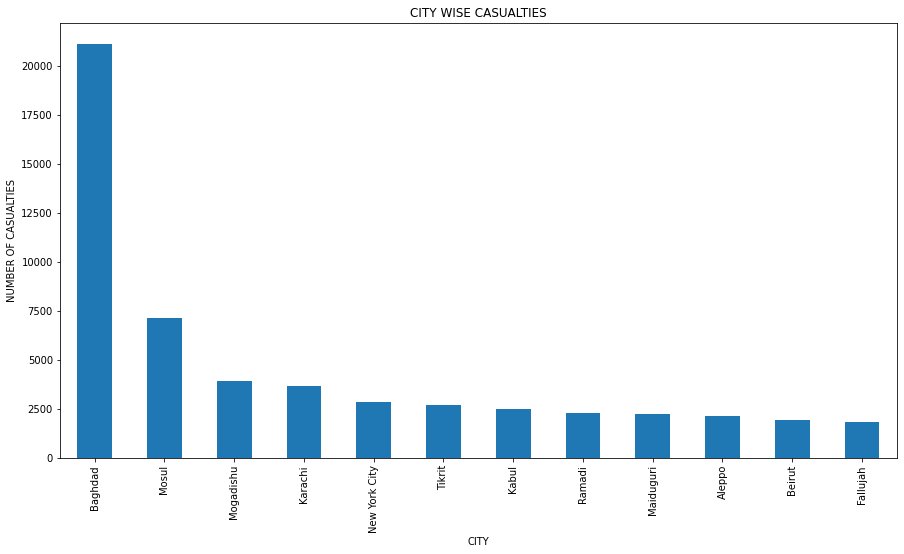

In [57]:
city_df.groupby('city')['people_killed'].sum().sort_values(ascending=False)[:12].plot.bar(xlabel='CITY',ylabel='NUMBER OF CASUALTIES',title='CITY WISE CASUALTIES',figsize=(15,8))

In [58]:
# Terrorist activities by Groups

index_gang = new_df[(new_df['gang_name'] == 'Unknown')].index

gang_df = new_df.drop(index_gang)

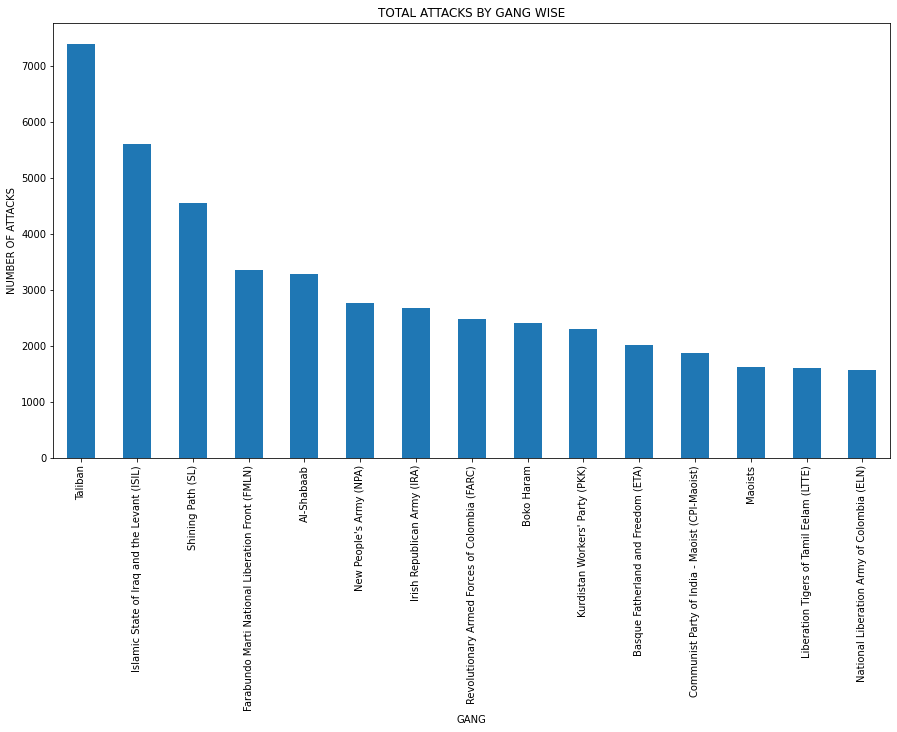

In [129]:
gang_df.groupby('gang_name')['gang_name'].count().sort_values(ascending=False)[:15].plot.bar(xlabel='GANG',ylabel='NUMBER OF ATTACKS',title='TOTAL ATTACKS BY GANG WISE',figsize=(15,8),rot=90)

In [60]:
# Target type attacks
index_target = new_df[(new_df['target_type'] == 'Unknown')].index

target_df = new_df.drop(index_target)

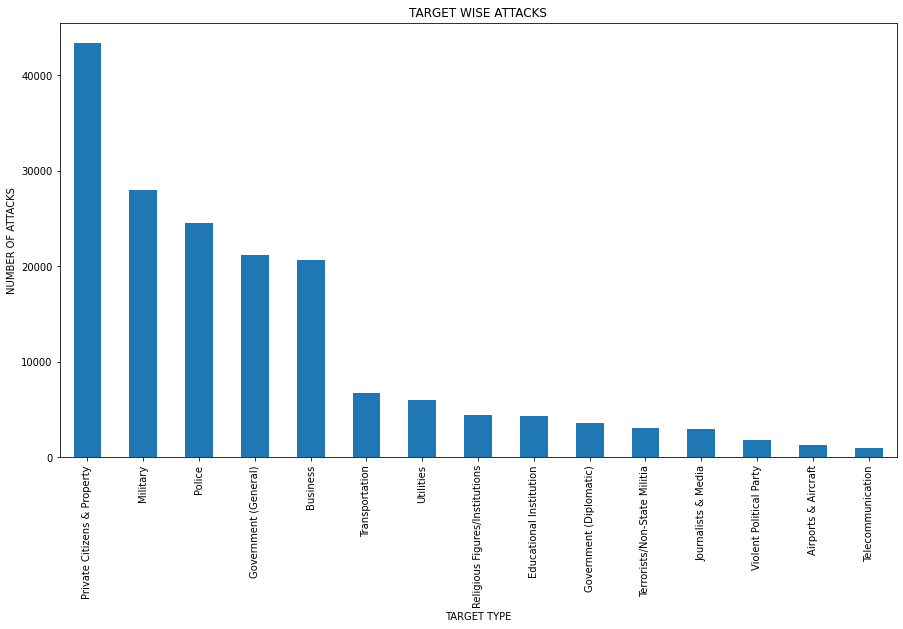

In [126]:
target_df.groupby('target_type')['target_type'].count().sort_values(ascending=False)[:15].plot.bar(xlabel='TARGET TYPE',ylabel='NUMBER OF ATTACKS',title='TARGET WISE ATTACKS',figsize=(15,8))

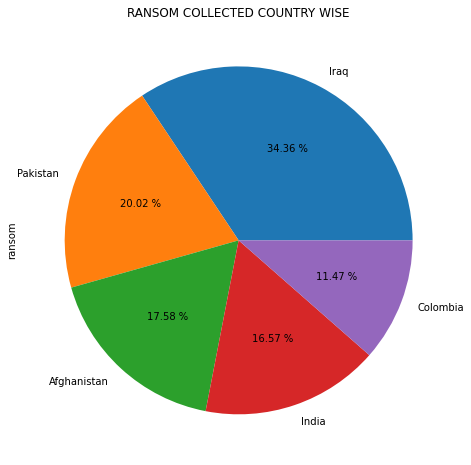

In [78]:
#Ransom collected country wise

new_df.groupby('country')['ransom'].sum().sort_values(ascending=False)[:5].plot.pie(title='RANSOM COLLECTED COUNTRY WISE',figsize=(15,8), autopct='%.2f %%')